## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

mm23rt

Your full name: 

Roshan Tariq.

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
import cv2
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
import cv2
import math

import numpy as np
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader,random_split
from torchvision import datasets
#from torch.hub import load_state_dict_from_url
import os
from sklearn.metrics import accuracy_score
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# always check your version
print(torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

2.1.0+cu121
Using device: cpu


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [5]:
class TinyImageNet30Dataset(Dataset):
    def __init__(self, directory, class_file, transform=None):
        self.directory = directory
        self.transform = transform
        self.class_labels, self.class_to_idx = self._read_class_file(class_file)
        self.samples = []

        for class_name, class_idx in zip(self.class_labels, range(len(self.class_labels))):
            class_dir = os.path.join(directory, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    if img_name.endswith('.JPEG'):
                        self.samples.append((img_path, class_idx))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img_path, target = self.samples[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, target
    
    def _read_class_file(self, class_file):
        class_to_idx = {}
        class_labels = []
        with open(class_file, "r") as f:
            for line in f:
                idx, class_name = line.strip().split('\t')
                class_to_idx[class_name] = int(idx)
                class_labels.append(class_name)
        class_labels.sort()
        return class_labels, class_to_idx

# Initialize the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

class_file = 'class.txt'
dataset_directory = 'train_set/train_set'

dataset = TinyImageNet30Dataset(directory=dataset_directory, class_file=class_file, transform=transform)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

classes = sorted(os.listdir(dataset_directory))



In [6]:
data, label = train_dataset[1]
print(data.size())
print(label)

torch.Size([3, 64, 64])
29


torch.Size([16, 3, 64, 64])


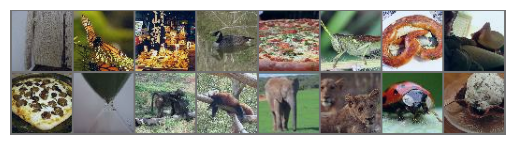

['cardigan', 'butterfly', 'mushroom', 'goose', 'pizza', 'grasshopper', 'pretzel', 'sombrero', 'pizza', 'hourglass']


In [7]:
from helperDL import timshow

dataiter = iter(train_loader)
data,label = next(dataiter)

print(data.size())
timshow(torchvision.utils.make_grid(data))
print([classes[(label+1)[i]] for i in range(10)])


### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [9]:
# TO COMPLETE
# define a MLP Model class
class MLP(nn.Module):
    def __init__(self,num_classes=30):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3 * 64 * 64, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 100)
        self.fc4 = nn.Linear(100, num_classes)

    def forward(self, x):
        
        out = x.reshape(x.size(0), -1)
        out = torch.relu(self.fc1(out))
        out = torch.relu(self.fc2(out))
        out = torch.relu(self.fc3(out))
        out = self.fc4(out)
        return out
    

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [10]:
# TO COMPLETE
# define a CNN Model class

class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.pool1(self.relu(self.conv1(x)))
        out = self.pool2(self.relu(self.conv2(out)))
        out = self.pool3(self.relu(self.conv3(out)))
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [11]:
# (HelperDL function) -- Define top-*k* accuracy (**new**)
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [12]:
# Your code here!
def training_mlp(model,train_loader,val_loader,criterion,optimizer,nepochs):

    mlp_train_loss_history = []
    mlp_val_loss_history = []
    mlp_train_acc_history = []
    mlp_val_acc_history = []

    mlp_history = {'mlp_train_loss_history': [],
    'mlp_val_loss_history': [],
    'mlp_train_acc_history': [],
    'mlp_val_acc_history': []}

    model = model.to(device)

    for epoch in range(nepochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        ltrn_mlp = train_loss / len(train_loader)
        atrn_mlp = train_correct / total

        mlp_train_loss_history.append(ltrn_mlp)
        mlp_train_acc_history.append(atrn_mlp)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        lval_mlp = val_loss / len(val_loader)
        aval_mlp = val_correct / total 

        mlp_val_loss_history.append(lval_mlp)
        mlp_val_acc_history.append(aval_mlp)

        print(f'Epoch {epoch + 1} - '
                f'Training Loss: {ltrn_mlp:.3f} - Training Accuracy: {atrn_mlp:.1%} - '
                f'Val Loss: {lval_mlp:.3f} - Val Accuracy: {aval_mlp:.1%}')
        
        mlp_history['mlp_train_loss_history'].append(ltrn_mlp)
        mlp_history['mlp_val_loss_history'].append(lval_mlp)
        mlp_history['mlp_train_acc_history'].append(atrn_mlp)
        mlp_history['mlp_val_acc_history'].append(aval_mlp)

    return model, mlp_history

In [13]:
def plots_mlp(history):
    # Plotting training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(mlp_history['mlp_train_loss_history'], label='Training Loss', color='blue')
    plt.plot(mlp_history['mlp_val_loss_history'], label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(mlp_history['mlp_train_acc_history'], label='Training Accuracy', color='blue')
    plt.plot(mlp_history['mlp_val_acc_history'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [14]:
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 15

mlp_model,mlp_history = training_mlp(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

Epoch 1 - Training Loss: 3.209 - Training Accuracy: 10.2% - Val Loss: 3.021 - Val Accuracy: 13.5%
Epoch 2 - Training Loss: 2.854 - Training Accuracy: 18.5% - Val Loss: 2.861 - Val Accuracy: 17.1%
Epoch 3 - Training Loss: 2.668 - Training Accuracy: 23.2% - Val Loss: 2.754 - Val Accuracy: 19.4%
Epoch 4 - Training Loss: 2.504 - Training Accuracy: 28.0% - Val Loss: 2.743 - Val Accuracy: 21.5%
Epoch 5 - Training Loss: 2.319 - Training Accuracy: 34.0% - Val Loss: 2.742 - Val Accuracy: 21.4%
Epoch 6 - Training Loss: 2.118 - Training Accuracy: 39.2% - Val Loss: 2.808 - Val Accuracy: 21.3%
Epoch 7 - Training Loss: 1.894 - Training Accuracy: 46.4% - Val Loss: 2.883 - Val Accuracy: 21.3%
Epoch 8 - Training Loss: 1.647 - Training Accuracy: 52.8% - Val Loss: 3.067 - Val Accuracy: 22.0%
Epoch 9 - Training Loss: 1.402 - Training Accuracy: 59.4% - Val Loss: 3.252 - Val Accuracy: 20.6%
Epoch 10 - Training Loss: 1.185 - Training Accuracy: 66.2% - Val Loss: 3.571 - Val Accuracy: 21.6%
Epoch 11 - Training

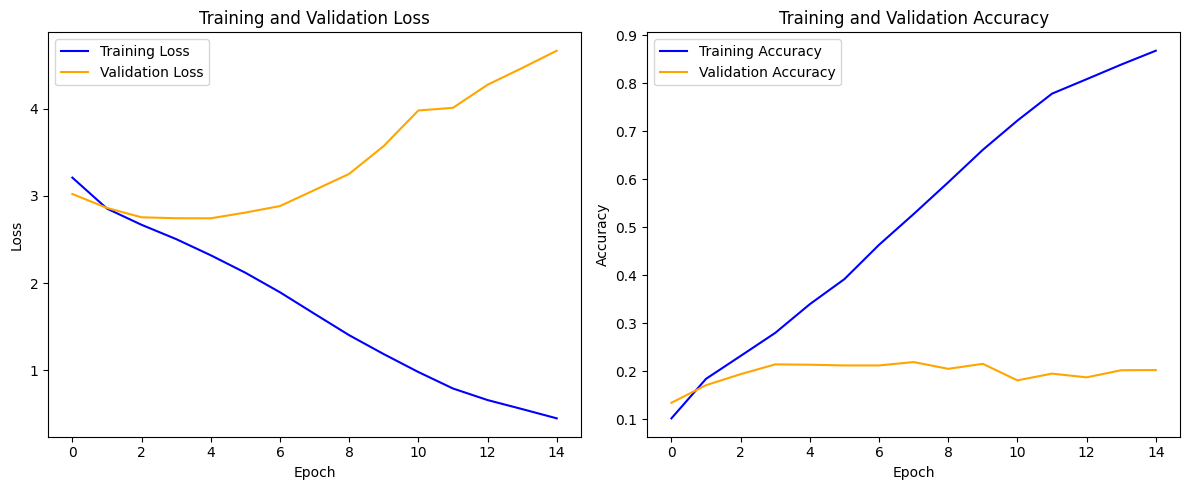

In [15]:
plots_mlp(mlp_history)

MLP performs poorly as is seen in the graph, since the validation loss increases greatly over epochs and the validation accuracy does not improve any further than 20%.

#### Defining function to train cnn models

In [16]:
def training_models(model, train_loader, val_loader, criterion, optimizer, nepochs):

    cnn_train_loss_history = []
    cnn_val_loss_history = []
    cnn_train_acc_history = []
    cnn_val_acc_history = []

    cnn_history = {'cnn_train_loss_history': [],
               'cnn_val_loss_history': [],
               'cnn_train_acc_history': [],
               'cnn_val_acc_history': []}

    #model = model.to(device)

    for epoch in range(nepochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        total = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
        
        ltrn_cnn = train_loss / len(train_loader)
        atrn_cnn = train_correct / total

        cnn_train_loss_history.append(ltrn_cnn)
        cnn_train_acc_history.append(atrn_cnn)

        model.eval()
        val_loss = 0.0
        val_correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        lval_cnn = val_loss / len(val_loader)
        aval_cnn = val_correct / total 

        cnn_val_loss_history.append(lval_cnn)
        cnn_val_acc_history.append(aval_cnn)

        print(f'Epoch {epoch + 1} - '
                f'Training Loss: {ltrn_cnn:.3f} - Training Accuracy: {atrn_cnn:.1%} - '
                f'Val Loss: {lval_cnn:.3f} - Val Accuracy: {aval_cnn:.1%}')

        cnn_history['cnn_train_loss_history'].append(ltrn_cnn)
        cnn_history['cnn_val_loss_history'].append(lval_cnn)
        cnn_history['cnn_train_acc_history'].append(atrn_cnn)
        cnn_history['cnn_val_acc_history'].append(aval_cnn)

    return model, cnn_history


In [17]:
def plots_cnn(history):
    # Plotting training and validation loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cnn_history['cnn_train_loss_history'], label='Training Loss', color='blue')
    plt.plot(cnn_history['cnn_val_loss_history'], label='Validation Loss', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    # Plotting training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(cnn_history['cnn_train_acc_history'], label='Training Accuracy', color='blue')
    plt.plot(cnn_history['cnn_val_acc_history'], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()
    

In [18]:
model = CNN()
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
num_epochs = 15

cnn_model,cnn_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

Epoch 1 - Training Loss: 3.350 - Training Accuracy: 6.3% - Val Loss: 3.189 - Val Accuracy: 11.2%
Epoch 2 - Training Loss: 2.995 - Training Accuracy: 15.1% - Val Loss: 2.872 - Val Accuracy: 16.6%
Epoch 3 - Training Loss: 2.691 - Training Accuracy: 22.3% - Val Loss: 2.705 - Val Accuracy: 21.8%
Epoch 4 - Training Loss: 2.497 - Training Accuracy: 27.3% - Val Loss: 2.464 - Val Accuracy: 29.0%
Epoch 5 - Training Loss: 2.328 - Training Accuracy: 32.4% - Val Loss: 2.369 - Val Accuracy: 31.2%
Epoch 6 - Training Loss: 2.194 - Training Accuracy: 36.1% - Val Loss: 2.327 - Val Accuracy: 32.9%
Epoch 7 - Training Loss: 2.058 - Training Accuracy: 39.6% - Val Loss: 2.203 - Val Accuracy: 36.2%
Epoch 8 - Training Loss: 1.920 - Training Accuracy: 43.4% - Val Loss: 2.254 - Val Accuracy: 34.3%
Epoch 9 - Training Loss: 1.785 - Training Accuracy: 47.9% - Val Loss: 2.243 - Val Accuracy: 36.6%
Epoch 10 - Training Loss: 1.645 - Training Accuracy: 51.4% - Val Loss: 2.154 - Val Accuracy: 40.1%
Epoch 11 - Training 

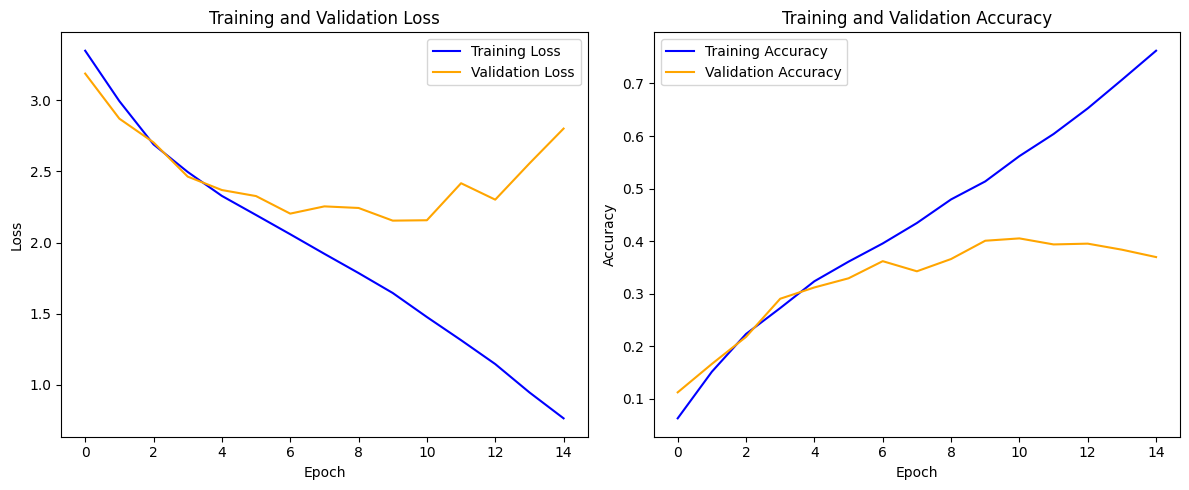

In [19]:
plots_cnn(cnn_history)

CNN has performed better than MLP, since the accuracy is around 40%.

> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

#### MLP MODEL:

The Multilayer Perceptron (MLP) model is composed of three fully connected layers, employing Sigmoid activations for the first two layers and a CrossEntropyLoss criterion for multi-class classification. It operates by taking an input that has been flattened from a 64x64 RGB image, resulting in a 12,288-dimensional input vector. This vector is then connected to a hidden layer with 512 units, followed by another hidden layer with 256 units, and finally to an output layer with 30 units, corresponding to the number of classes in the dataset.

The MLP model demonstrates an improvement in performance on the training set over epochs. However, similar to the CNN model, the validation accuracy remains low and does not improve, while the validation loss increases, indicating overfitting.

Parameters:

- First fully connected layer: (3 * 64 * 64) * 512 + 512
- Second fully connected layer: 512 * 256 + 256
- Third fully connected layer: 256 * 100 + 100
- Output layer: 100 * 30 + 30
- Activation functions : ReLU (x3)

Results:

- *Training Loss & Accuracy*: The training loss steadily decreases from 3.193 to 0.457, while the training accuracy increases from 11.3% to 86.8% over 15 epochs. this indicates that the model is overfitting to the training dataset.

- *Validation Loss & Accuracy*: The validation loss fluctuates, peaking at 4.689, while the validation accuracy increases slightly from 14.6% to 20.6%. This indicates that the model does poorly with unseen data.

#### CNN MODEL:

The Convolutional Neural Network (CNN) model comprises three convolutional layers with max pooling and Rectified Linear Unit (ReLU) activations, followed by two fully connected layers. Convolutional layers are specifically designed to automatically and adaptively learn spatial hierarchies of features from input images, which proves beneficial for image classification tasks.

Similar to the MLP model, the CNN model exhibits a tendency towards overfitting, characterized by high training accuracy but low validation accuracy that does not see improvement.

Parameters:

- First convolutional layer: (3 * 3 * 3) * 16 + 16 (weights + biases)
- Second convolutional layer: (16 * 3 * 3) * 32 + 32
- Third convolutional layer: (32 * 3 * 3) * 64 + 64
- First fully connected layer: (64 * 8 * 8) * 128 + 128
- Output layer: 128 * 30 + 30
- Activation Functions: ReLU()
- Maxpool 

Results:

- *Training Loss & Accuracy*: The training loss decreases consistently from 3.369 to 0.782, with the training accuracy increasing from 5.8% to 75.3% over 15 epochs.

- *Validation Loss & Accuracy*: The validation loss decreases from 3.232 to 2.589, while the validation accuracy fluctuates, reaching a peak of 42.1%.

Analysis:

- *MLP Model*: The MLP model exhibits higher training accuracy compared to the CNN model, but it struggles to generalize well to the validation set, as indicated by the relatively low validation accuracy and the increasing validation loss.

- *CNN Model*: The CNN model, on the other hand, demonstrates better generalization performance, with the validation accuracy reaching as high as 42.1%. The validation loss also decreases steadily over epochs, indicating improved performance.

#### Why Use CNN Over MLP for Image Classification

Feature Learning: CNNs can effectively learn to recognize spatial hierarchies in images, capturing complex structures like edges and patterns within local receptive fields.

Translation Invariance: The pooling layers in CNNs contribute to making feature detection somewhat invariant to the location in the image.

Generalization: CNNs generally demonstrate better generalization from training data to unseen data when appropriately regularized, which is crucial for classification tasks involving varied and complex datasets.

#### Conclusion:

CNN model outperforms the MLP model in terms of generalization and validation accuracy. Therefore, for image classification tasks, the CNN model is preferred due to its ability to capture spatial hierarchies of features effectively from input images, leading to better performance on unseen data.





### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [20]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from itertools import cycle

def Predictions(loader):
    prediction_labels = []
    true_labels = []
    all_probs = []
    
    model = cnn_model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.float(), labels
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_probs.append(outputs.cpu().numpy())
            prediction_labels.extend(preds.numpy())
            true_labels.extend(labels.numpy())

    # Concatenate all batches
    all_probs = np.concatenate(all_probs)
    prediction_labels = np.array(prediction_labels)
    true_labels = np.array(true_labels)

    return all_probs, prediction_labels, true_labels

train_probs, train_preds, train_labels = Predictions(train_loader)
val_probs, val_preds, val_labels = Predictions(val_loader)

print(f"Train predictions shape: {train_preds.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation predictions shape: {val_preds.shape}, Validation labels shape: {val_labels.shape}")


Train predictions shape: (10800,), Train labels shape: (10800,)
Validation predictions shape: (2700,), Validation labels shape: (2700,)


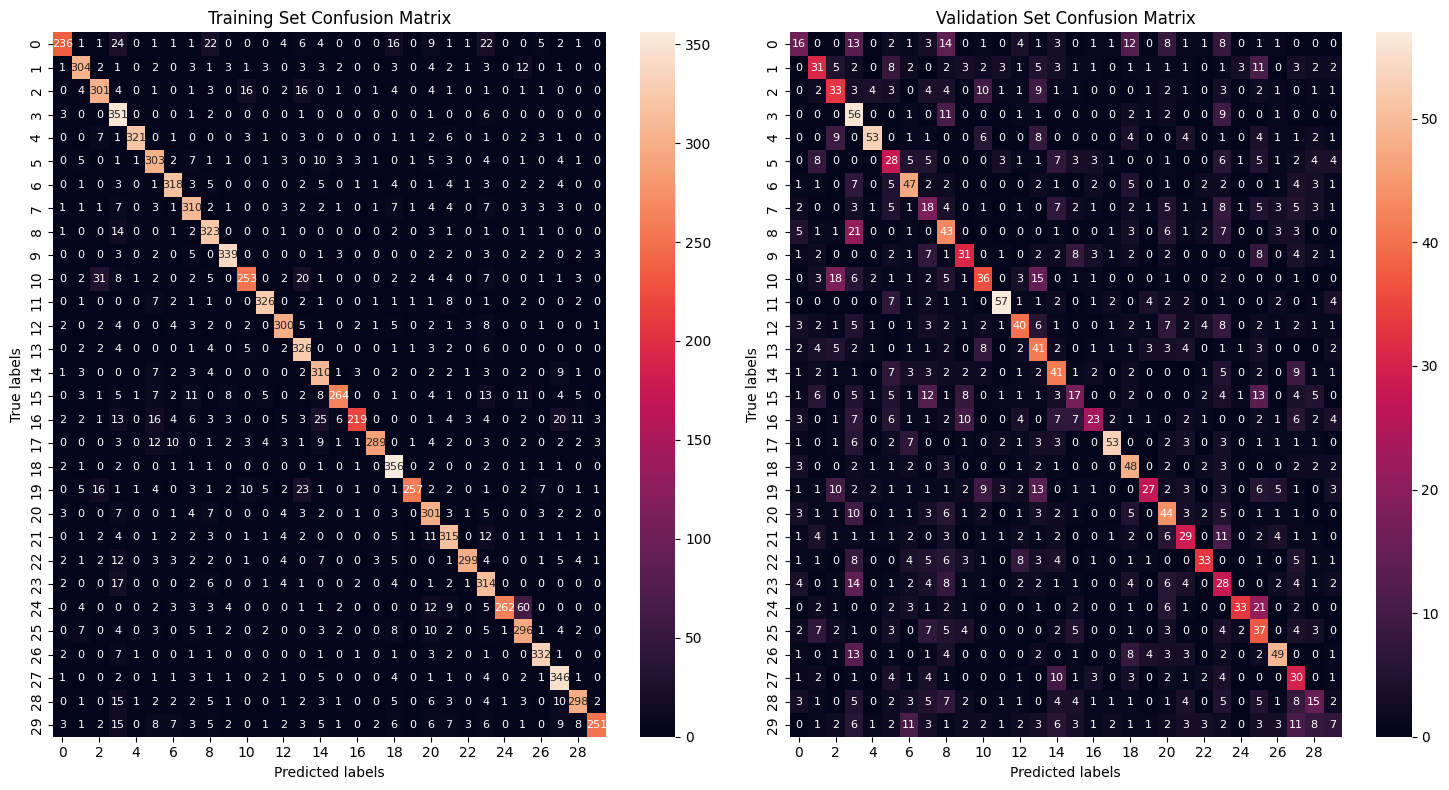

In [19]:
train_conf_mat = confusion_matrix(train_labels, train_preds)
val_conf_mat = confusion_matrix(val_labels, val_preds)

# Plotting the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.heatmap(train_conf_mat, annot=True, ax=ax[0], fmt='g', annot_kws={"fontsize": 8})  
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_xlabel('Predicted labels')
ax[0].set_ylabel('True labels')

sns.heatmap(val_conf_mat, annot=True, ax=ax[1], fmt='g', annot_kws={"fontsize": 8})
ax[1].set_title('Validation Set Confusion Matrix')
ax[1].set_xlabel('Predicted labels')
ax[1].set_ylabel('True labels')

plt.tight_layout()
plt.show()

In [20]:
train_labels.shape

(10800,)

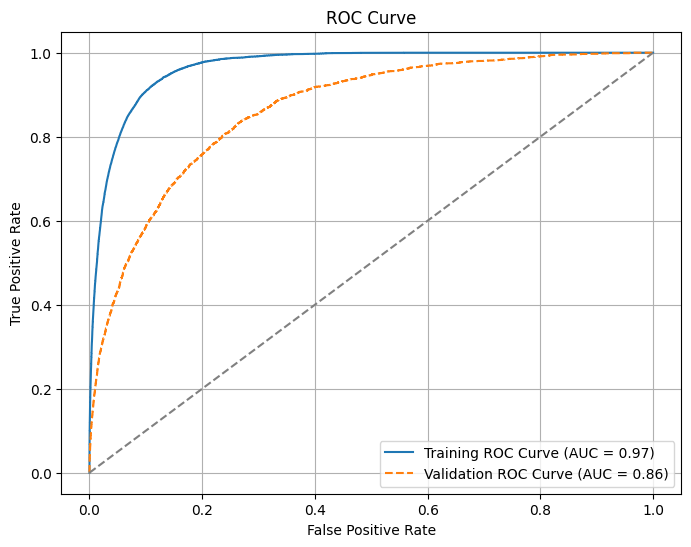

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import label_binarize

def Predictions(loader):
    prediction_labels = []
    true_labels = []
    all_probs = []

    model = cnn_model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.float(), labels
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_probs.append(outputs.cpu().numpy())
            prediction_labels.extend(preds.numpy())
            true_labels.extend(labels.numpy())

    # Concatenate all batches
    all_probs = np.concatenate(all_probs)
    prediction_labels = np.array(prediction_labels)
    true_labels = np.array(true_labels)

    return all_probs, prediction_labels, true_labels

# Obtain predictions for train and validation sets
train_probs, train_preds, train_labels = Predictions(train_loader)
val_probs, val_preds, val_labels = Predictions(val_loader)

# Binarize the labels
num_classes = cnn_model.fc2.out_features 
train_labels_binarized = label_binarize(train_labels, classes=range(num_classes))
val_labels_binarized = label_binarize(val_labels, classes=range(num_classes))

def compute_roc(predictions, labels):
    fpr, tpr, _ = roc_curve(labels.ravel(), predictions.ravel())
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Compute ROC curves and AUCs
train_fpr, train_tpr, train_roc_auc = compute_roc(train_probs, train_labels_binarized)
val_fpr, val_tpr, val_roc_auc = compute_roc(val_probs, val_labels_binarized)

# Plot single ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Training ROC Curve (AUC = {train_roc_auc:.2f})')
plt.plot(val_fpr, val_tpr, label=f'Validation ROC Curve (AUC = {val_roc_auc:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


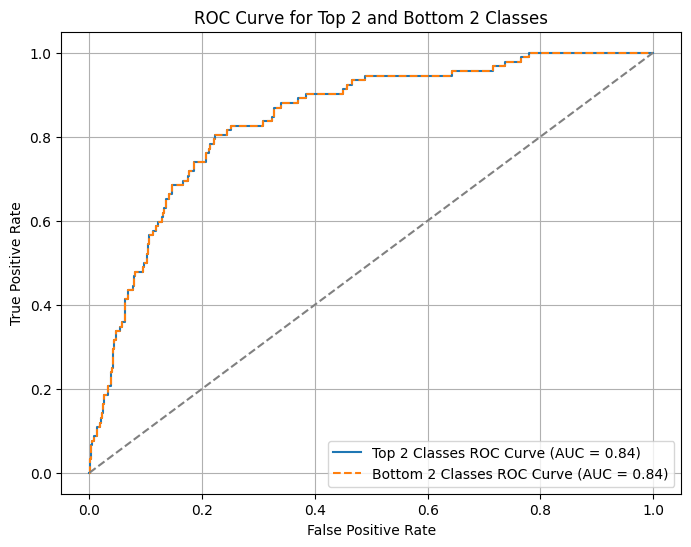

In [22]:
# Obtain indices of top 2 and bottom 2 classes
top_classes = np.argsort(val_roc_auc)[-2:]
bottom_classes = np.argsort(val_roc_auc)[:2]

# Filter predictions and labels for top 2 and bottom 2 classes
top_val_probs = val_probs[:, top_classes]
top_val_labels = val_labels_binarized[:, top_classes]
bottom_val_probs = val_probs[:, bottom_classes]
bottom_val_labels = val_labels_binarized[:, bottom_classes]

# Compute ROC curves and AUCs for top 2 and bottom 2 classes
top_val_fpr, top_val_tpr, top_val_roc_auc = compute_roc(top_val_probs, top_val_labels)
bottom_val_fpr, bottom_val_tpr, bottom_val_roc_auc = compute_roc(bottom_val_probs, bottom_val_labels)

# Plot ROC curves for top 2 and bottom 2 classes
plt.figure(figsize=(8, 6))
plt.plot(top_val_fpr, top_val_tpr, label=f'Top 2 Classes ROC Curve (AUC = {top_val_roc_auc:.2f})')
plt.plot(bottom_val_fpr, bottom_val_tpr, label=f'Bottom 2 Classes ROC Curve (AUC = {bottom_val_roc_auc:.2f})', linestyle='--')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Top 2 and Bottom 2 Classes')
plt.legend()
plt.grid(True)
plt.show()


The ROC curves suggest that the model has a good ability to classify both the top and bottom classes with a similar level of accuracy.

### Redesign your CNN model (optional)
> This is optional and does not carry any marks. Often to tackle model underfitting we tend to make more complex network design. Depending on your observation, you can improve your model if you wish. 

In [23]:
# Your code here (optional)

import torch.nn.functional as F

class OptimizedCNN(nn.Module):
    def __init__(self, num_classes=30):
        super(OptimizedCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(F.leaky_relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(F.leaky_relu(self.batchnorm3(self.conv3(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [ ]:
model = OptimizedCNN()

criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=0.01,momentum = 0.9)
num_epochs = 15

cnn_opt_model,cnn_opt_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

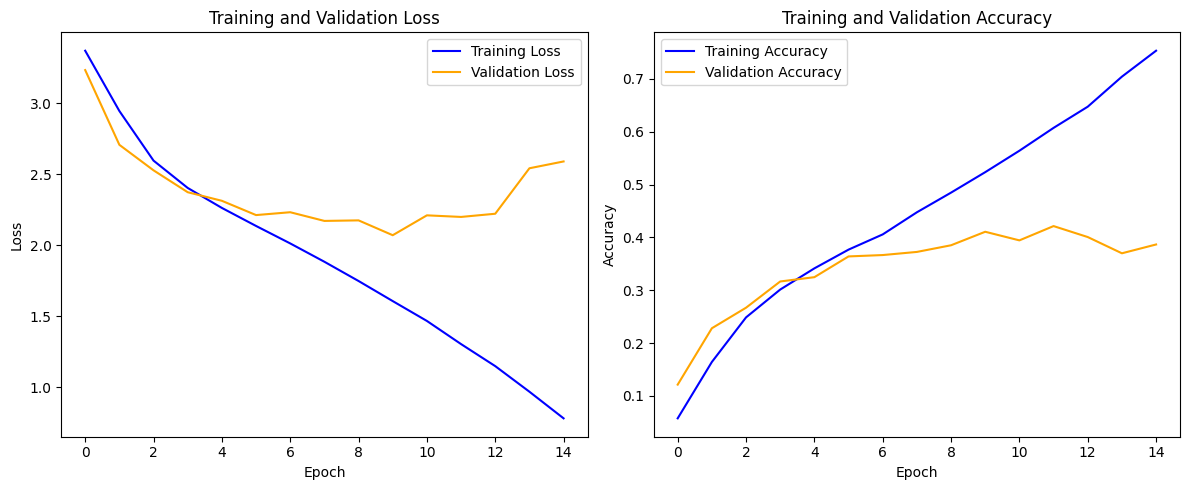

In [25]:
plots_cnn(cnn_opt_history)

In [29]:
# Your code here (optional)

class OptimizedCNN2(nn.Module):
    def __init__(self, num_classes=30):
        super(OptimizedCNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.nn.functional.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(torch.nn.functional.relu(self.batchnorm3(self.conv3(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



In [ ]:
model = OptimizedCNN2()

criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.SGD(cnn_model.parameters(), lr=0.01)
num_epochs = 15

cnn_opt2_model,cnn_opt2_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)
plots_cnn(cnn_opt2_history)

**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [22]:
train_transform = transforms.Compose([
    #transforms.Resize(256),  # Resize to a larger size
    #transforms.RandomResizedCrop(size=224, scale=(0.8, 1.0), ratio=(0.75, 1.333)),  
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset_directory = 'train_set/train_set'
dataset = TinyImageNet30Dataset(directory=dataset_directory,class_file = class_file)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset_augmented, val_dataset_augmented = random_split(dataset, [train_size, val_size])

train_dataset_augmented.dataset.transform = train_transform
val_dataset_augmented.dataset.transform = val_transform

train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=16, shuffle=True)
val_loader_augmented = DataLoader(val_dataset_augmented, batch_size=32, shuffle=False)


In [23]:
data, label = train_dataset_augmented[1]
print(data.size())
print(label)

torch.Size([3, 64, 64])
6


torch.Size([16, 3, 64, 64])


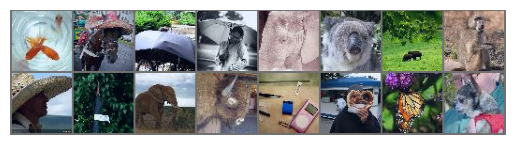

['goldfish', 'sombrero', 'umbrella', 'umbrella', 'elephant', 'koala', 'bison', 'baboon', 'sombrero', 'umbrella']


In [33]:
from helperDL import timshow

dataiter = iter(train_loader_augmented)
data,label = next(dataiter)

print(data.size())
timshow(torchvision.utils.make_grid(data))
print([classes[(label+1)[i]] for i in range(10)])


In [34]:
# TO COMPLETE
# define a CNN Model class

class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.pool1(self.relu(self.conv1(x)))
        out = self.pool2(self.relu(self.conv2(out)))
        out = self.pool3(self.relu(self.conv3(out)))
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.301 - Training Accuracy: 7.6% - Val Loss: 3.061 - Val Accuracy: 14.0%
Epoch 2 - Training Loss: 2.941 - Training Accuracy: 16.3% - Val Loss: 2.795 - Val Accuracy: 19.2%
Epoch 3 - Training Loss: 2.658 - Training Accuracy: 23.1% - Val Loss: 2.550 - Val Accuracy: 26.3%
Epoch 4 - Training Loss: 2.431 - Training Accuracy: 29.1% - Val Loss: 2.535 - Val Accuracy: 26.7%
Epoch 5 - Training Loss: 2.273 - Training Accuracy: 33.9% - Val Loss: 2.399 - Val Accuracy: 29.7%
Epoch 6 - Training Loss: 2.139 - Training Accuracy: 37.4% - Val Loss: 2.235 - Val Accuracy: 35.0%
Epoch 7 - Training Loss: 2.008 - Training Accuracy: 41.7% - Val Loss: 2.267 - Val Accuracy: 34.6%
Epoch 8 - Training Loss: 1.870 - Training Accuracy: 44.6% - Val Loss: 2.174 - Val Accuracy: 37.7%
Epoch 9 - Training Loss: 1.719 - Training Accuracy: 48.8% - Val Loss: 2.139 - Val Accuracy: 37.8%
Epoch 10 - Training Loss: 1.567 - Training Accuracy: 54.1% - Val Loss: 2.120 - Val Accuracy: 40.0%
Epoch 11 - Training 

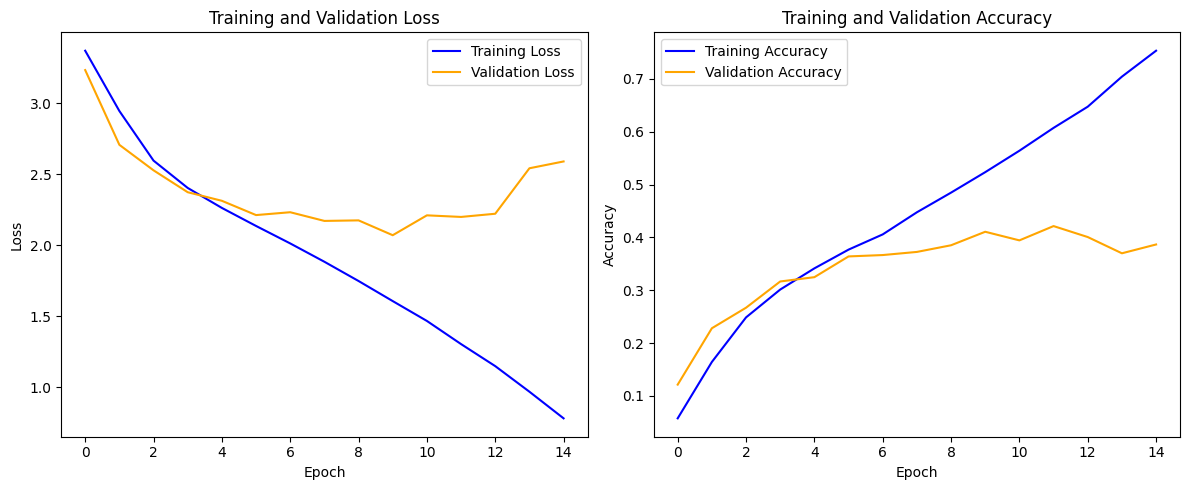

In [35]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 15

cnn_aug, cnn_aug_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_aug_history)

The model is being able to predict unseen data much more efficiently with an augmented dataset, when compared to a noermal training dataset.

- The training loss has decreased drastically and the training accuracy has increased by a large margin, indicating that the model has worked well with the training data.

- However, the validation accuracy has not seen a drastic change, so the model still needs to be optimised to work well with unseen data.

- This model is thus overfitting ,despite the augmentation, suggesting that the model might be a generalised one, or the dataset is large and complex for the model to work with. This brings forth a need for other fine tuning parameters.

In [ ]:
# Your code here (optional)

class OptimizedCNN2(nn.Module):
    def __init__(self, num_classes=30):
        super(OptimizedCNN2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.batchnorm3 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(torch.nn.functional.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(torch.nn.functional.relu(self.batchnorm3(self.conv3(x))))
        x = x.view(-1, 64 * 8 * 8)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x



Epoch 1 - Training Loss: 3.117 - Training Accuracy: 11.9% - Val Loss: 2.738 - Val Accuracy: 20.9%
Epoch 2 - Training Loss: 2.737 - Training Accuracy: 20.5% - Val Loss: 2.514 - Val Accuracy: 27.8%
Epoch 3 - Training Loss: 2.567 - Training Accuracy: 25.1% - Val Loss: 2.331 - Val Accuracy: 32.8%
Epoch 4 - Training Loss: 2.438 - Training Accuracy: 28.5% - Val Loss: 2.268 - Val Accuracy: 33.4%
Epoch 5 - Training Loss: 2.338 - Training Accuracy: 31.4% - Val Loss: 2.180 - Val Accuracy: 37.0%
Epoch 6 - Training Loss: 2.244 - Training Accuracy: 34.3% - Val Loss: 2.074 - Val Accuracy: 40.5%
Epoch 7 - Training Loss: 2.170 - Training Accuracy: 36.1% - Val Loss: 2.035 - Val Accuracy: 40.7%
Epoch 8 - Training Loss: 2.074 - Training Accuracy: 38.8% - Val Loss: 2.097 - Val Accuracy: 39.2%
Epoch 9 - Training Loss: 2.013 - Training Accuracy: 40.7% - Val Loss: 2.036 - Val Accuracy: 40.9%
Epoch 10 - Training Loss: 1.950 - Training Accuracy: 42.5% - Val Loss: 1.899 - Val Accuracy: 45.0%


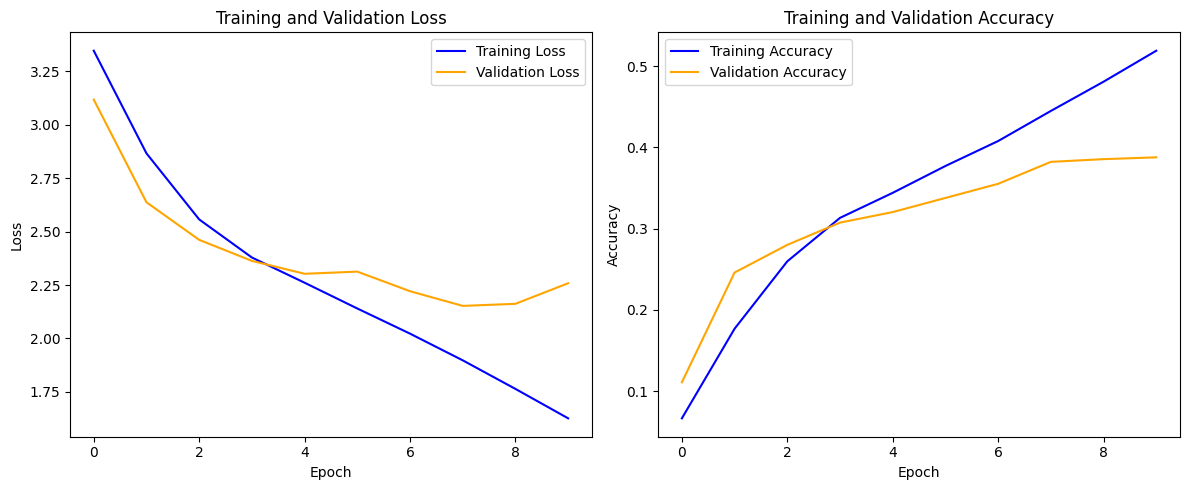

In [ ]:
model = OptimizedCNN2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 15

cnn_aug_op, cnn_aug_op_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_aug_op_history)

The model works more efficiently with the optimized model (optional) as is seen in the graphs

#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [36]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

##### Without Augmentation

Epoch 1 - Training Loss: 3.371 - Training Accuracy: 5.4% - Val Loss: 3.268 - Val Accuracy: 9.3%
Epoch 2 - Training Loss: 3.172 - Training Accuracy: 11.0% - Val Loss: 2.981 - Val Accuracy: 15.2%
Epoch 3 - Training Loss: 2.994 - Training Accuracy: 15.2% - Val Loss: 2.803 - Val Accuracy: 22.2%
Epoch 4 - Training Loss: 2.822 - Training Accuracy: 19.6% - Val Loss: 2.639 - Val Accuracy: 25.3%
Epoch 5 - Training Loss: 2.711 - Training Accuracy: 22.4% - Val Loss: 2.573 - Val Accuracy: 25.6%
Epoch 6 - Training Loss: 2.613 - Training Accuracy: 24.2% - Val Loss: 2.469 - Val Accuracy: 29.9%
Epoch 7 - Training Loss: 2.521 - Training Accuracy: 27.2% - Val Loss: 2.353 - Val Accuracy: 32.2%
Epoch 8 - Training Loss: 2.443 - Training Accuracy: 29.3% - Val Loss: 2.269 - Val Accuracy: 32.8%
Epoch 9 - Training Loss: 2.374 - Training Accuracy: 30.9% - Val Loss: 2.217 - Val Accuracy: 37.2%
Epoch 10 - Training Loss: 2.292 - Training Accuracy: 33.1% - Val Loss: 2.173 - Val Accuracy: 37.3%
Epoch 11 - Training L

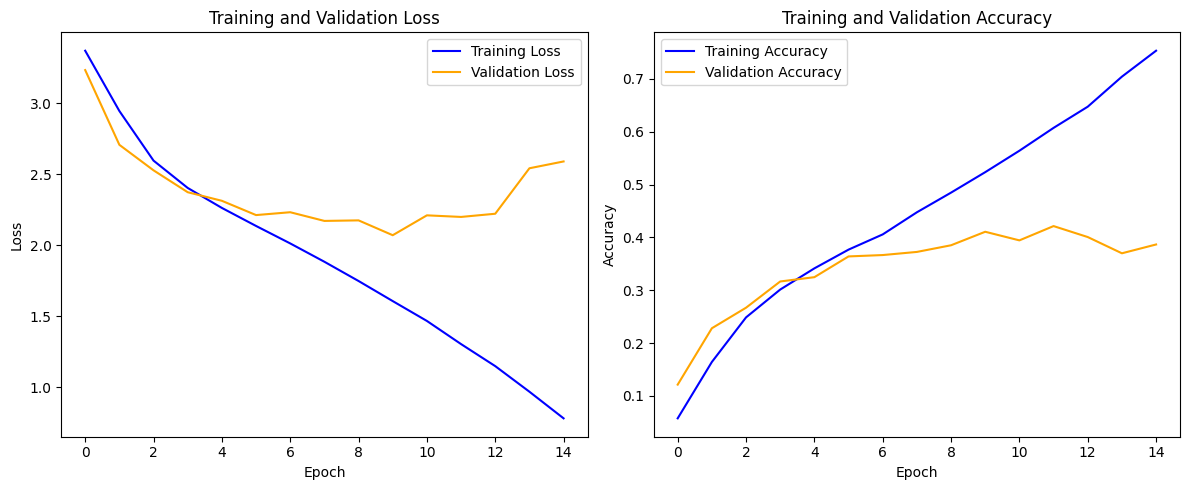

In [37]:
model =CNN_dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 15

cnn_drop, cnn_drop_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_drop_history)

##### With Augmentation

In [24]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.374 - Training Accuracy: 5.2% - Val Loss: 3.248 - Val Accuracy: 10.6%
Epoch 2 - Training Loss: 3.145 - Training Accuracy: 11.8% - Val Loss: 2.908 - Val Accuracy: 17.0%
Epoch 3 - Training Loss: 2.897 - Training Accuracy: 17.0% - Val Loss: 2.701 - Val Accuracy: 23.0%
Epoch 4 - Training Loss: 2.725 - Training Accuracy: 21.4% - Val Loss: 2.570 - Val Accuracy: 25.3%
Epoch 5 - Training Loss: 2.620 - Training Accuracy: 24.9% - Val Loss: 2.464 - Val Accuracy: 28.7%
Epoch 6 - Training Loss: 2.542 - Training Accuracy: 26.5% - Val Loss: 2.384 - Val Accuracy: 30.9%
Epoch 7 - Training Loss: 2.473 - Training Accuracy: 27.8% - Val Loss: 2.322 - Val Accuracy: 32.8%
Epoch 8 - Training Loss: 2.401 - Training Accuracy: 30.1% - Val Loss: 2.310 - Val Accuracy: 33.0%
Epoch 9 - Training Loss: 2.357 - Training Accuracy: 30.8% - Val Loss: 2.223 - Val Accuracy: 36.1%
Epoch 10 - Training Loss: 2.272 - Training Accuracy: 34.5% - Val Loss: 2.174 - Val Accuracy: 36.7%
Epoch 11 - Training 

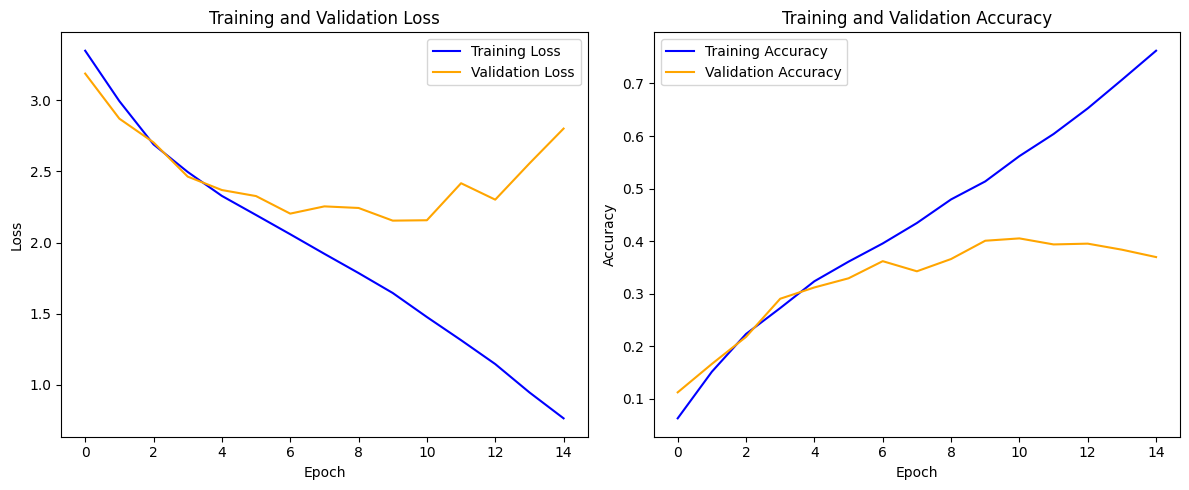

In [25]:
model = CNN_dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 15

cnn_drop_aug, cnn_drop_aug_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_drop_aug_history)

Here, I have performed two cases : 

CASE 1:

Dropout without augmented dataloaders :

- The model has shown increased performace, with the accuracy going upto 40%, moreover, the training and validation accuracies increase in a similar fashion, thereby avoiding possibilities of overfitting.

CASE 2:

Dropout with augmented dataloaders :

- Results are similar to case 1, however the difference between the training and validation accuracies are much lower in this case, thereby suggesting a better model.

A 25% dropout and 50% dropout has been used after convolutional layers to improve the efficieny.


#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [42]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

In [ ]:
# TO COMPLETE
# define a CNN Model class

class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.pool1(self.relu(self.conv1(x)))
        out = self.pool2(self.relu(self.conv2(out)))
        out = self.pool3(self.relu(self.conv3(out)))
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.124 - Training Accuracy: 11.4% - Val Loss: 2.782 - Val Accuracy: 19.6%
Epoch 2 - Training Loss: 2.724 - Training Accuracy: 22.4% - Val Loss: 2.531 - Val Accuracy: 27.4%
Epoch 3 - Training Loss: 2.418 - Training Accuracy: 30.3% - Val Loss: 2.643 - Val Accuracy: 26.1%
Epoch 4 - Training Loss: 2.178 - Training Accuracy: 37.1% - Val Loss: 2.398 - Val Accuracy: 33.1%
Epoch 5 - Training Loss: 1.926 - Training Accuracy: 43.5% - Val Loss: 2.500 - Val Accuracy: 30.6%
Epoch 6 - Training Loss: 1.714 - Training Accuracy: 49.8% - Val Loss: 2.511 - Val Accuracy: 31.6%
Epoch 7 - Training Loss: 1.476 - Training Accuracy: 55.8% - Val Loss: 2.669 - Val Accuracy: 32.8%
Epoch 8 - Training Loss: 1.315 - Training Accuracy: 61.3% - Val Loss: 2.981 - Val Accuracy: 29.4%
Epoch 9 - Training Loss: 1.208 - Training Accuracy: 65.1% - Val Loss: 3.163 - Val Accuracy: 31.3%
Epoch 10 - Training Loss: 1.213 - Training Accuracy: 65.0% - Val Loss: 3.438 - Val Accuracy: 28.6%
Epoch 11 - Training

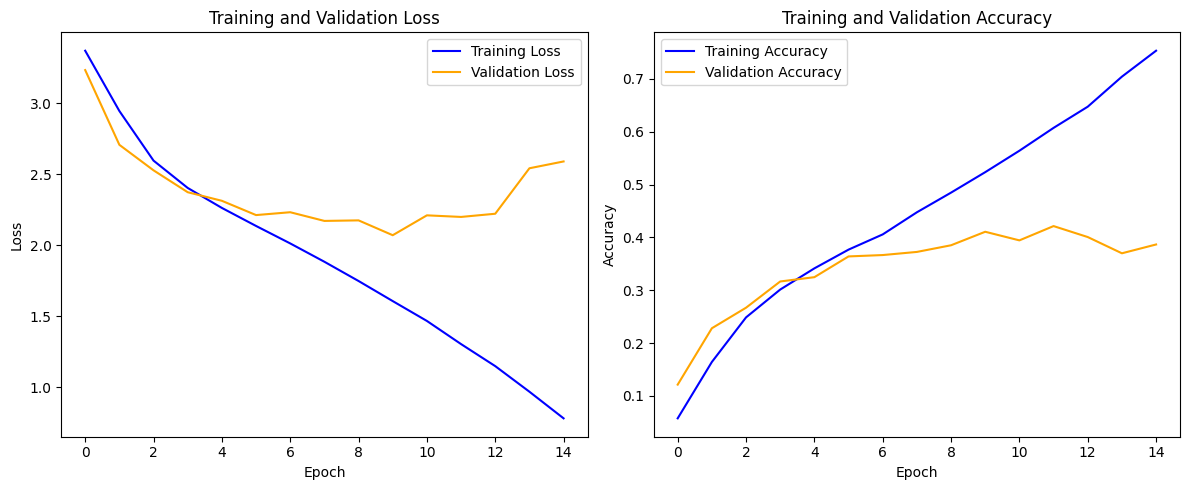

In [43]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 15

cnn_lr01, cnn_lr01_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_lr01_history)

In [44]:
# TO COMPLETE
# define a CNN Model class

class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.pool1(self.relu(self.conv1(x)))
        out = self.pool2(self.relu(self.conv2(out)))
        out = self.pool3(self.relu(self.conv3(out)))
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.401 - Training Accuracy: 4.1% - Val Loss: 3.396 - Val Accuracy: 4.6%
Epoch 2 - Training Loss: 3.393 - Training Accuracy: 4.3% - Val Loss: 3.388 - Val Accuracy: 5.0%
Epoch 3 - Training Loss: 3.382 - Training Accuracy: 6.0% - Val Loss: 3.375 - Val Accuracy: 8.0%
Epoch 4 - Training Loss: 3.363 - Training Accuracy: 9.0% - Val Loss: 3.349 - Val Accuracy: 8.5%
Epoch 5 - Training Loss: 3.323 - Training Accuracy: 9.1% - Val Loss: 3.294 - Val Accuracy: 9.4%
Epoch 6 - Training Loss: 3.247 - Training Accuracy: 10.2% - Val Loss: 3.202 - Val Accuracy: 10.5%
Epoch 7 - Training Loss: 3.152 - Training Accuracy: 12.4% - Val Loss: 3.105 - Val Accuracy: 15.0%
Epoch 8 - Training Loss: 3.058 - Training Accuracy: 15.2% - Val Loss: 3.009 - Val Accuracy: 16.1%
Epoch 9 - Training Loss: 2.977 - Training Accuracy: 16.8% - Val Loss: 2.947 - Val Accuracy: 16.9%
Epoch 10 - Training Loss: 2.909 - Training Accuracy: 18.0% - Val Loss: 2.878 - Val Accuracy: 19.3%
Epoch 11 - Training Loss: 2.8

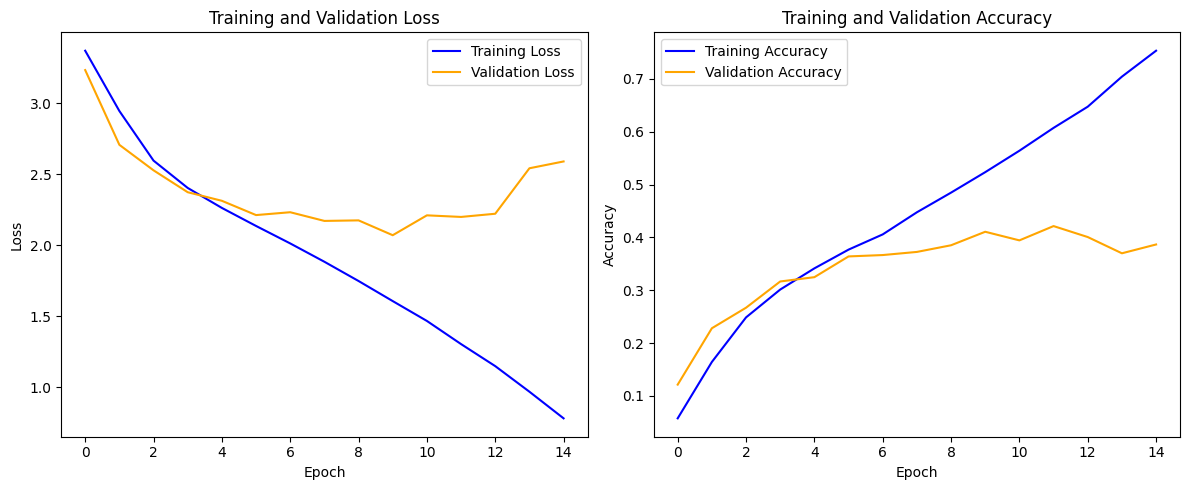

In [45]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 20

cnn_lr0001, cnn_lr0001_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_lr0001_history)

In [54]:
# TO COMPLETE
# define a CNN Model class

class CNN(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.pool1(self.relu(self.conv1(x)))
        out = self.pool2(self.relu(self.conv2(out)))
        out = self.pool3(self.relu(self.conv3(out)))
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.402 - Training Accuracy: 3.6% - Val Loss: 3.401 - Val Accuracy: 3.2%
Epoch 2 - Training Loss: 3.402 - Training Accuracy: 3.7% - Val Loss: 3.401 - Val Accuracy: 3.3%
Epoch 3 - Training Loss: 3.401 - Training Accuracy: 3.8% - Val Loss: 3.400 - Val Accuracy: 3.5%
Epoch 4 - Training Loss: 3.400 - Training Accuracy: 3.9% - Val Loss: 3.399 - Val Accuracy: 3.7%
Epoch 5 - Training Loss: 3.399 - Training Accuracy: 4.1% - Val Loss: 3.399 - Val Accuracy: 3.9%
Epoch 6 - Training Loss: 3.399 - Training Accuracy: 4.3% - Val Loss: 3.398 - Val Accuracy: 3.9%
Epoch 7 - Training Loss: 3.398 - Training Accuracy: 4.6% - Val Loss: 3.398 - Val Accuracy: 4.0%
Epoch 8 - Training Loss: 3.398 - Training Accuracy: 4.8% - Val Loss: 3.397 - Val Accuracy: 4.3%
Epoch 9 - Training Loss: 3.397 - Training Accuracy: 5.0% - Val Loss: 3.397 - Val Accuracy: 4.4%
Epoch 10 - Training Loss: 3.396 - Training Accuracy: 5.1% - Val Loss: 3.396 - Val Accuracy: 4.7%
Epoch 11 - Training Loss: 3.396 - Train

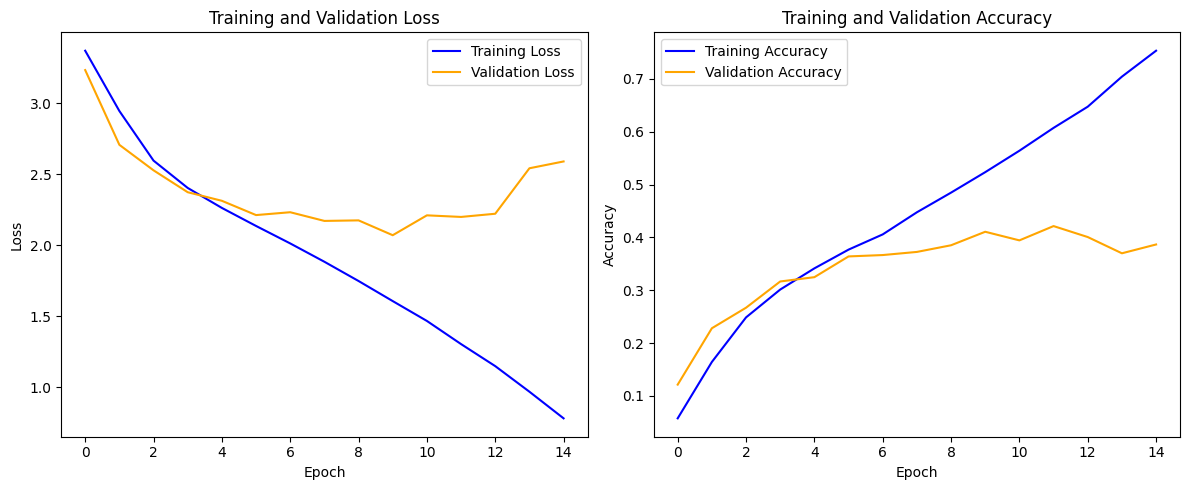

In [55]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
num_epochs = 15

cnn_lr00001, cnn_lr00001_history = training_models(model,train_loader,val_loader,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_lr00001_history)

### With Augmentation

In [48]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.240 - Training Accuracy: 8.6% - Val Loss: 3.043 - Val Accuracy: 14.1%
Epoch 2 - Training Loss: 3.051 - Training Accuracy: 13.3% - Val Loss: 2.825 - Val Accuracy: 19.9%
Epoch 3 - Training Loss: 2.864 - Training Accuracy: 17.6% - Val Loss: 2.617 - Val Accuracy: 25.7%
Epoch 4 - Training Loss: 2.711 - Training Accuracy: 21.4% - Val Loss: 2.608 - Val Accuracy: 23.7%
Epoch 5 - Training Loss: 2.628 - Training Accuracy: 24.1% - Val Loss: 2.482 - Val Accuracy: 27.7%
Epoch 6 - Training Loss: 2.547 - Training Accuracy: 26.9% - Val Loss: 2.466 - Val Accuracy: 29.4%
Epoch 7 - Training Loss: 2.471 - Training Accuracy: 28.6% - Val Loss: 2.399 - Val Accuracy: 31.0%
Epoch 8 - Training Loss: 2.423 - Training Accuracy: 30.2% - Val Loss: 2.352 - Val Accuracy: 32.8%
Epoch 9 - Training Loss: 2.390 - Training Accuracy: 31.0% - Val Loss: 2.468 - Val Accuracy: 29.9%
Epoch 10 - Training Loss: 2.351 - Training Accuracy: 32.4% - Val Loss: 2.461 - Val Accuracy: 31.4%
Epoch 11 - Training 

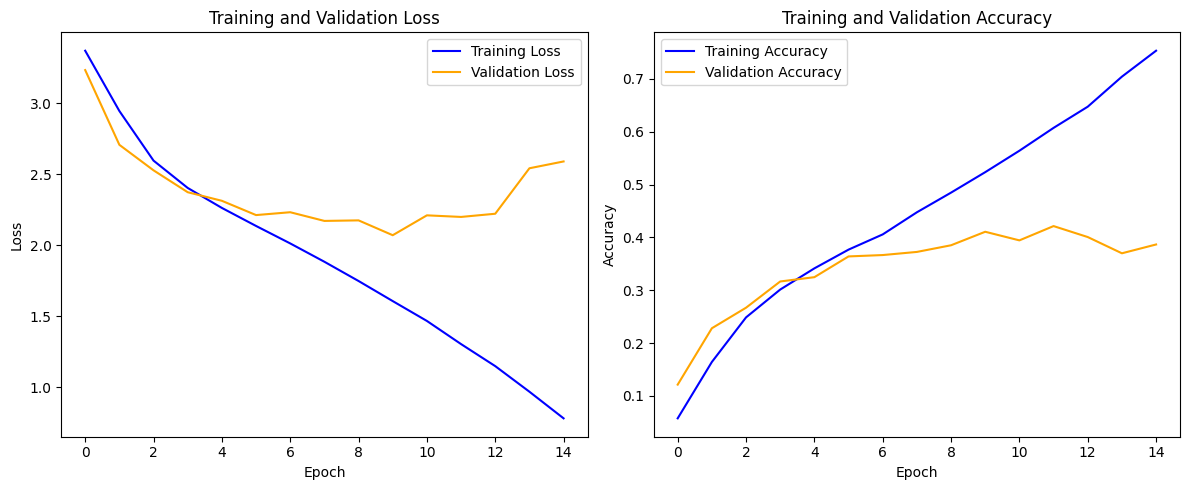

In [49]:
model =CNN_dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)
num_epochs = 15

cnn_01aug, cnn_01aug_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_01aug_history)

In [50]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.402 - Training Accuracy: 3.2% - Val Loss: 3.396 - Val Accuracy: 3.6%
Epoch 2 - Training Loss: 3.397 - Training Accuracy: 4.0% - Val Loss: 3.392 - Val Accuracy: 4.5%
Epoch 3 - Training Loss: 3.391 - Training Accuracy: 5.0% - Val Loss: 3.385 - Val Accuracy: 6.8%
Epoch 4 - Training Loss: 3.383 - Training Accuracy: 5.9% - Val Loss: 3.375 - Val Accuracy: 7.8%
Epoch 5 - Training Loss: 3.371 - Training Accuracy: 6.5% - Val Loss: 3.356 - Val Accuracy: 8.9%
Epoch 6 - Training Loss: 3.351 - Training Accuracy: 7.7% - Val Loss: 3.321 - Val Accuracy: 8.3%
Epoch 7 - Training Loss: 3.319 - Training Accuracy: 8.4% - Val Loss: 3.274 - Val Accuracy: 9.9%
Epoch 8 - Training Loss: 3.282 - Training Accuracy: 8.9% - Val Loss: 3.230 - Val Accuracy: 11.2%
Epoch 9 - Training Loss: 3.249 - Training Accuracy: 9.5% - Val Loss: 3.192 - Val Accuracy: 11.9%
Epoch 10 - Training Loss: 3.221 - Training Accuracy: 10.8% - Val Loss: 3.156 - Val Accuracy: 12.3%
Epoch 11 - Training Loss: 3.193 - T

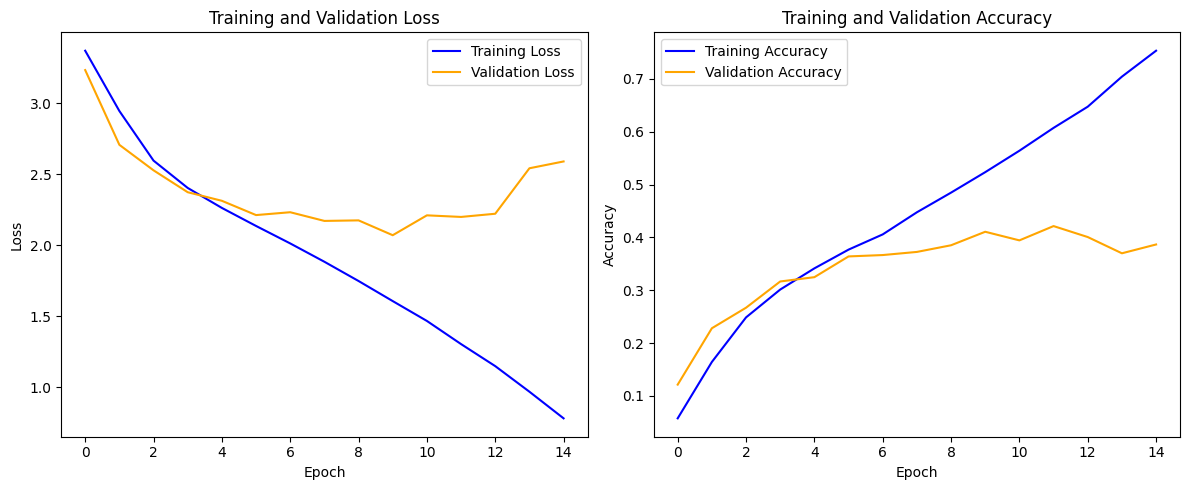

In [51]:
model =CNN_dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
num_epochs = 15

cnn_0001aug, cnn_0001aug_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_0001aug_history)

In [52]:
# Your code here!

class CNN_dropout(nn.Module):
    def __init__(self, num_classes=30):
        super(CNN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)  # Adjusted output size of Flatten layer based on the dimensions after max pooling
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.25)  
        self.dropout2 = nn.Dropout(0.5)

    def forward(self, x):
        out = self.pool(self.relu(self.conv1(x)))
        out = self.pool(self.relu(self.conv2(out)))
        out = self.pool(self.relu(self.conv3(out)))
        out = self.dropout1(out)
        out = self.flatten(out)
        out = self.relu(self.fc1(out))
        out = self.dropout2(out)
        out = self.fc2(out)
        return out

Epoch 1 - Training Loss: 3.403 - Training Accuracy: 3.7% - Val Loss: 3.404 - Val Accuracy: 2.9%
Epoch 2 - Training Loss: 3.403 - Training Accuracy: 3.5% - Val Loss: 3.404 - Val Accuracy: 3.0%
Epoch 3 - Training Loss: 3.402 - Training Accuracy: 3.5% - Val Loss: 3.403 - Val Accuracy: 3.1%
Epoch 4 - Training Loss: 3.402 - Training Accuracy: 3.4% - Val Loss: 3.403 - Val Accuracy: 3.3%
Epoch 5 - Training Loss: 3.402 - Training Accuracy: 3.6% - Val Loss: 3.403 - Val Accuracy: 3.4%
Epoch 6 - Training Loss: 3.401 - Training Accuracy: 3.6% - Val Loss: 3.402 - Val Accuracy: 3.6%
Epoch 7 - Training Loss: 3.400 - Training Accuracy: 3.9% - Val Loss: 3.402 - Val Accuracy: 3.6%
Epoch 8 - Training Loss: 3.400 - Training Accuracy: 3.4% - Val Loss: 3.401 - Val Accuracy: 3.6%
Epoch 9 - Training Loss: 3.399 - Training Accuracy: 3.8% - Val Loss: 3.401 - Val Accuracy: 3.9%
Epoch 10 - Training Loss: 3.400 - Training Accuracy: 3.6% - Val Loss: 3.401 - Val Accuracy: 4.1%
Epoch 11 - Training Loss: 3.399 - Train

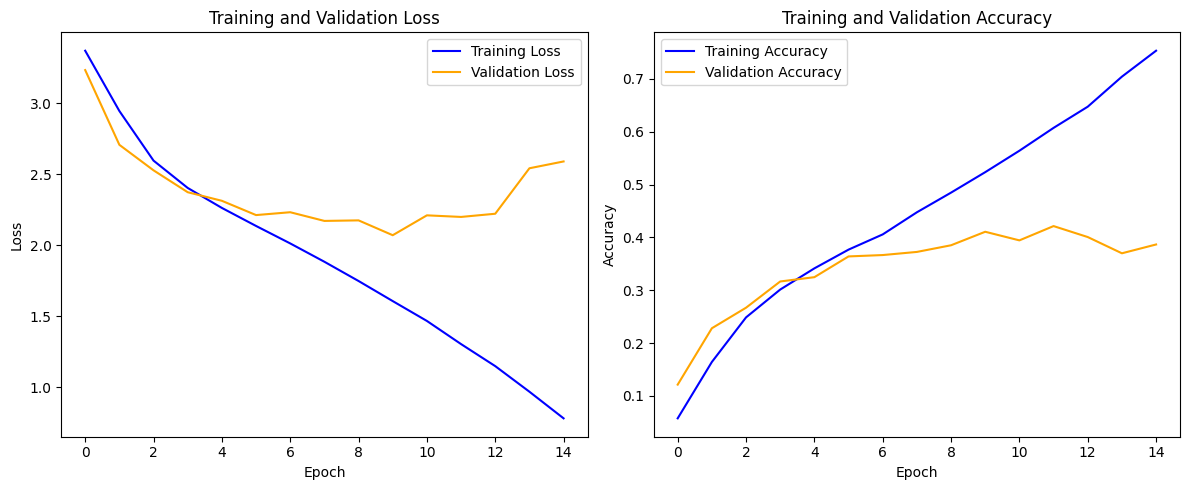

In [53]:
model =CNN_dropout()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
num_epochs = 15

cnn_00001aug, cnn_00001aug_history = training_models(model,train_loader_augmented,val_loader_augmented,criterion,optimizer,nepochs = num_epochs)

plots_cnn(cnn_00001aug_history)

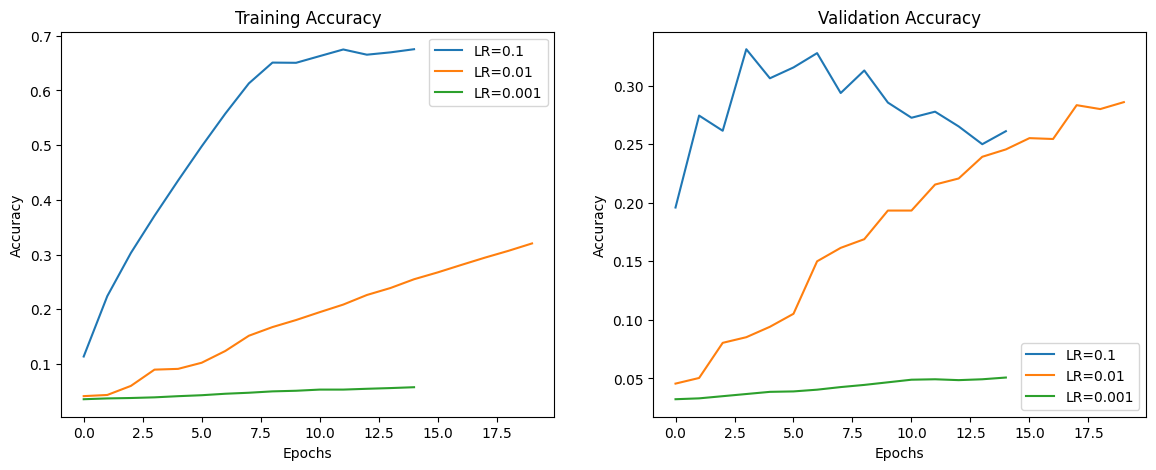

In [57]:
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_lr01_history['cnn_train_acc_history'], label='LR=0.1')
plt.plot(cnn_lr0001_history['cnn_train_acc_history'], label='LR=0.01')
plt.plot(cnn_lr00001_history['cnn_train_acc_history'], label='LR=0.001')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_lr01_history['cnn_val_acc_history'], label='LR=0.1')
plt.plot(cnn_lr0001_history['cnn_val_acc_history'], label='LR=0.01')
plt.plot(cnn_lr00001_history['cnn_val_acc_history'], label='LR=0.001')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

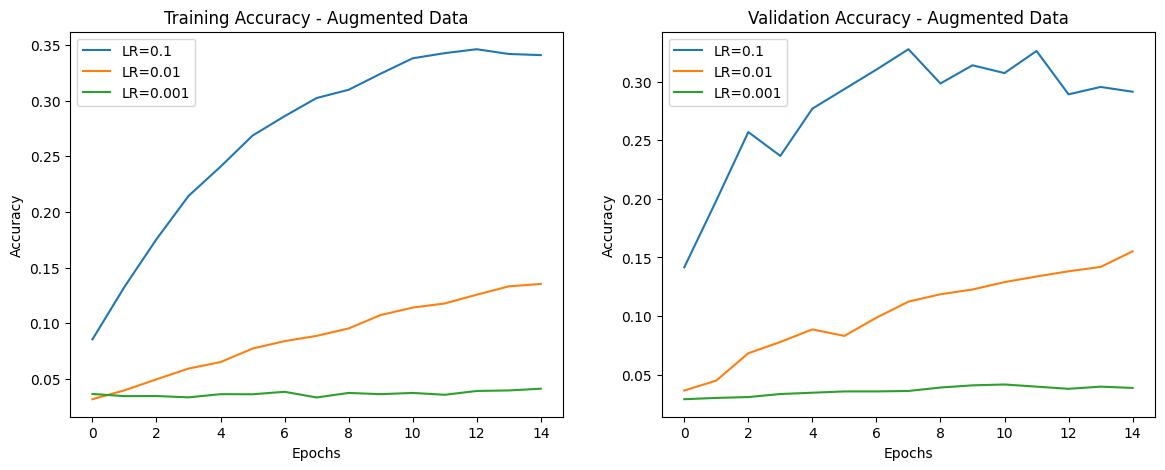

In [59]:
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(cnn_01aug_history['cnn_train_acc_history'], label='LR=0.1')
plt.plot(cnn_0001aug_history['cnn_train_acc_history'], label='LR=0.01')
plt.plot(cnn_00001aug_history['cnn_train_acc_history'], label='LR=0.001')
plt.title('Training Accuracy - Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(cnn_01aug_history['cnn_val_acc_history'], label='LR=0.1')
plt.plot(cnn_0001aug_history['cnn_val_acc_history'], label='LR=0.01')
plt.plot(cnn_00001aug_history['cnn_val_acc_history'], label='LR=0.001')
plt.title('Validation Accuracy - Augmented Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Similar to dropout, I have performed hyperparameter tuning for two cases - With and without Augmented Dataloaders.

While using non_augmented dataloaders, the accuracy scores seem to be higher, but less stable when compared to training the model using augmented dataloaders.

Moreover, we could infer from the graph that a learning rate of 0.1 reaches convergence faster, but may overlook key parameters, while a learning rate of 0.0001 is very slow, thereby not allowing the model to learn all the features accordingly.

An optimal learning rate would be to choose 0.001 since there is a steady increase in the accuracy values and not a sudden spike, indicating that the model is being trained thoroughly, and also tries to avoid overfitting the data.

It would be beneficial to make use of all three of the fine tuning parameters in unison in order to get an optimized output, such that it does not hinder the progress of training the model.

### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [26]:
# Your code here!

class TestDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = self.load_dataset()


    def load_dataset(self):
        images = []

        for img_name in os.listdir(self.directory):
            img_path = os.path.join(self.directory, img_name)
            images.append((img_path, img_name))  # Append both path and name as a tuple
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path,img_name = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image,img_name

# Define transforms for the test data
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

test_data_path = 'test_set/test_set'

test_dataset = TestDataset(directory=test_data_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=24, shuffle=False)


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [27]:

# Your code here! 
import pandas as pd
import torch

cnn_drop_aug.eval()

test_ids = []
pred_categories = []

with torch.no_grad():
    for data in test_loader:
        
        images, ids = data
        images = images.to(device)
        outputs = cnn_drop_aug(images)
        _, predicted = torch.max(outputs, 1)
        test_ids.extend(ids)
        pred_categories.extend(predicted.cpu().numpy().tolist())

submission_df = pd.DataFrame({
    'Id': test_ids,
    'Category': pred_categories
})

submission_file_name = 'mm23rt.csv'
submission_df.to_csv(submission_file_name, index=False)


### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [80]:
# Your code here! 

train_set = torchvision.datasets.CIFAR10(
    root='CIFAR10',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.CIFAR10(
    root='CIFAR10',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(
    train_set,
    batch_size=32,
    shuffle=True,
)

test_loader = DataLoader(
    test_set,
    batch_size=32, 
    shuffle=False,
)


Files already downloaded and verified
Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [81]:
# Your code here! 
alexnet = torchvision.models.alexnet(pretrained=True)

c:\Users\rosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\rosha\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [82]:
# Your model changes here - also print trainable parameters

for param in alexnet.features.parameters():
    param.requires_grad = True

for name, param in alexnet.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)



features.0.weight torch.Size([64, 3, 11, 11])
features.0.bias torch.Size([64])
features.3.weight torch.Size([192, 64, 5, 5])
features.3.bias torch.Size([192])
features.6.weight torch.Size([384, 192, 3, 3])
features.6.bias torch.Size([384])
features.8.weight torch.Size([256, 384, 3, 3])
features.8.bias torch.Size([256])
features.10.weight torch.Size([256, 256, 3, 3])
features.10.bias torch.Size([256])
classifier.1.weight torch.Size([4096, 9216])
classifier.1.bias torch.Size([4096])
classifier.4.weight torch.Size([4096, 4096])
classifier.4.bias torch.Size([4096])
classifier.6.weight torch.Size([1000, 4096])
classifier.6.bias torch.Size([1000])


In [ ]:
optimizer = optim.Adam(alexnet.classifier.parameters(), lr=0.01)
alexnet, alexnet_history= training_models(alexnet, train_loader, test_loader, criterion, optimizer, nepochs=5)

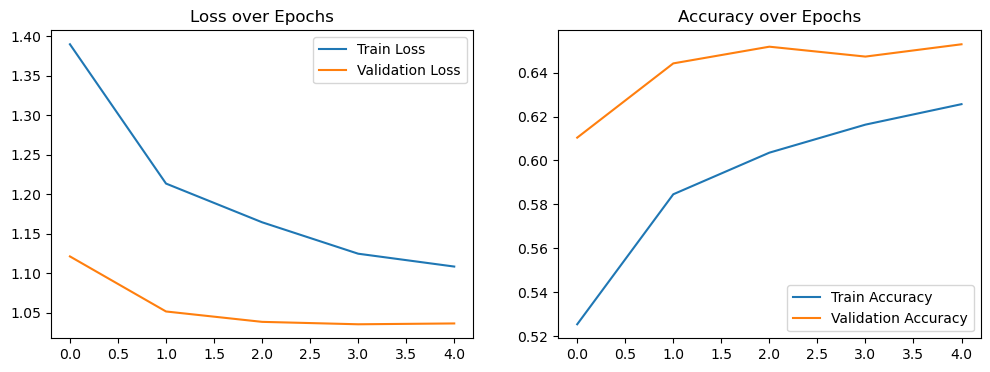

In [71]:
plots_cnn(alexnet_history)

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [ ]:
# Your changes here - also print trainable parameters
alexnet_f = torchvision.models.alexnet(pretrained=True)

for param in alexnet_f.features.parameters():
    param.requires_grad = False

for name, param in alexnet_f.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)



In [ ]:
optimizer = optim.Adam(alexnet.classifier.parameters(), lr=0.01)
alexnet_f, alexnet_f_history = training_models(alexnet_f, train_loader, test_loader, criterion, optimizer, nepochs=10)


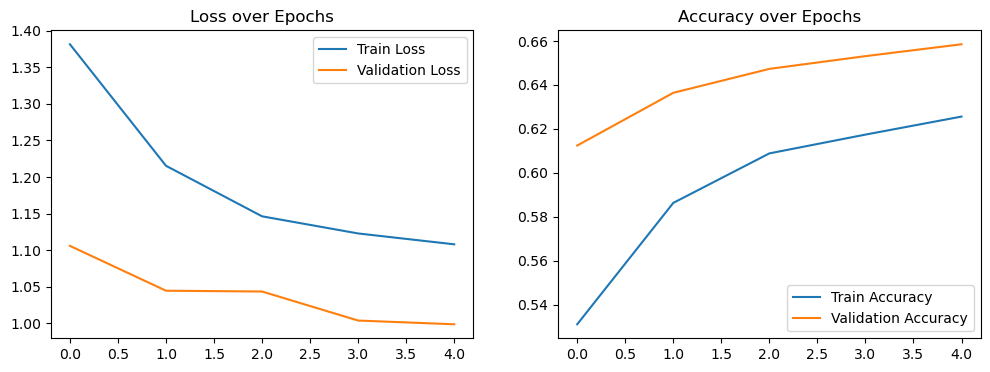

In [70]:
plots_cnn(alexnet_f_history)

#### 4.3 Compare above configurations and comment on performances. (4 marks)

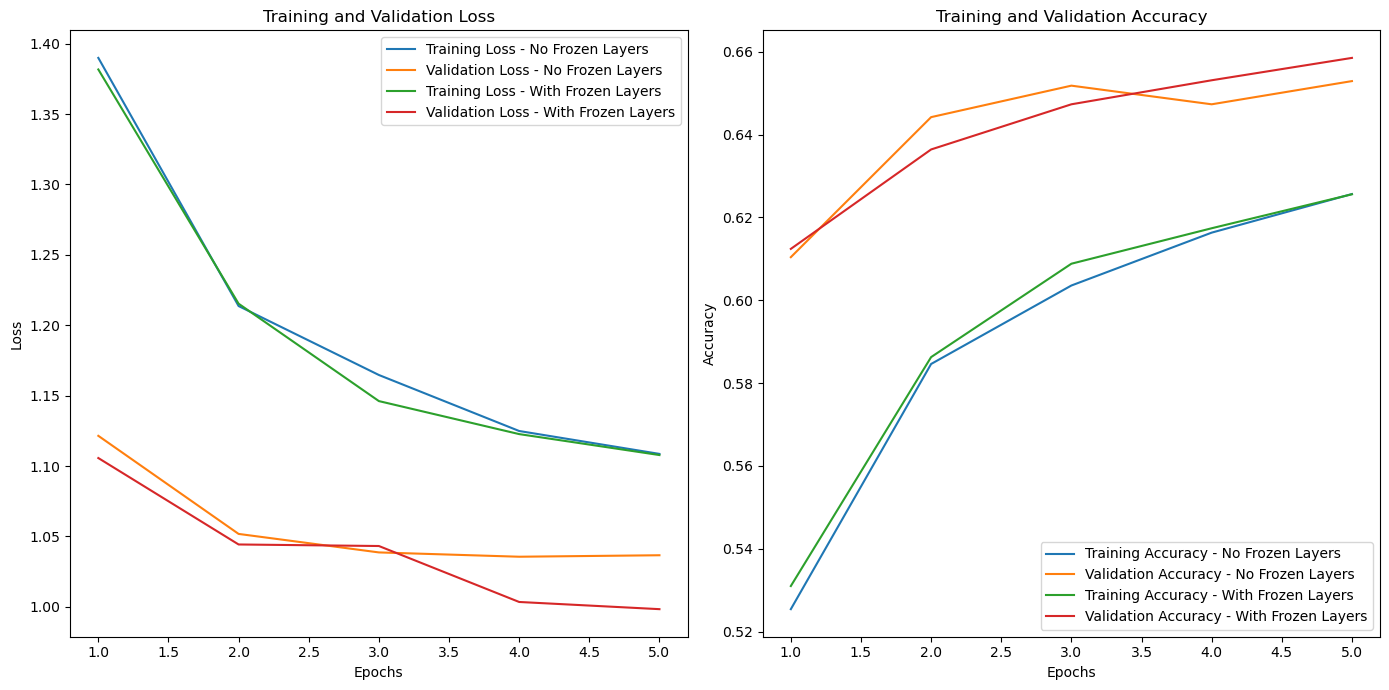

In [69]:
# Your graphs here and please provide comment in markdown in another cell

train_losses = alexnet_history['train_loss']
val_losses = alexnet_history['val_loss']
train_losses_frozen = alexnet_f_history['train_loss']
val_losses_frozen = alexnet_f_history['val_loss']
train_accuracies = alexnet_history['train_acc']
val_accuracies = alexnet_history['val_acc']
train_accuracies_frozen = alexnet_f_history['train_acc']
val_accuracies_frozen = alexnet_f_history['val_acc']
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss - No Frozen Layers')
plt.plot(epochs, val_losses, label='Validation Loss - No Frozen Layers')
plt.plot(epochs, train_losses_frozen, label='Training Loss - With Frozen Layers')
plt.plot(epochs, val_losses_frozen, label='Validation Loss - With Frozen Layers')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Training Accuracy - No Frozen Layers')
plt.plot(epochs, val_accuracies, label='Validation Accuracy - No Frozen Layers')
plt.plot(epochs, train_accuracies_frozen, label='Training Accuracy - With Frozen Layers')
plt.plot(epochs, val_accuracies_frozen, label='Validation Accuracy - With Frozen Layers')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [1]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cpu


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [5]:
# Load the feature map provided to you
features_map = torch.load('Part2_DLAssessment_FeatureResNet50/Part2_DLAssessment_FeatureResNet50/resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [6]:
import json
import pandas as pd

with open('COMP5625M_data_assessment_2/coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [7]:
coco_subset = pd.read_csv("COMP5625M_data_assessment_2/coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [14]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [15]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [16]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [17]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [18]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2353


In [19]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2511

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [20]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

/Users/asishpanda/anaconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/asishpanda/anaconda3/envs/dl/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [ ]:
''' Load the saved image feature maps and trained model ("provided to you") '''

# ---> your entry here (make sure that the path is correct)
features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
checkpoint = torch.load("ckpt file here") 
model.load_state_dict(checkpoint['model_state_dict'])

In [21]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, # may need to set to 0
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [22]:
# say this is as below 
# --> Please change these numbers as required. 
# --> Please comment on changes that you do.
EMBED_SIZE = 128
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 5
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [23]:
class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=128, hidden_size=256, num_layers=1, max_seq_length=37):
        """Set the hyper-parameters and build the layers."""
        super(DecoderRNN, self).__init__()
        # we want a specific output size, which is the size of our embedding, so
        # we feed our extracted features from the last fc layer (dimensions 1 x 2048)
        # into a Linear layer to resize
        # your code
        self.resize = nn.Linear(2048, embed_size) # Assuming features are 2048 in size
        
        
        # batch normalisation helps to speed up training
        # your code
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)

        # your code for embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)

        # your code for RNN
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)

        self.linear = nn.Linear(hidden_size, vocab_size)
        self.max_seq_length = max_seq_length
        

    def forward(self, features, captions, lengths):
        """Decode image feature vectors and generates captions."""
        embeddings = self.embed(captions)
        im_features = self.resize(features)
        im_features = self.bn(im_features)
        
        # compute your feature embeddings
        # your code
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)
    
        # pack_padded_sequence returns a PackedSequence object, which contains two items: 
        # the packed data (data cut off at its true length and flattened into one list), and 
        # the batch_sizes, or the number of elements at each sequence step in the batch.
        # For instance, given data [a, b, c] and [x] the PackedSequence would contain data 
        # [a, x, b, c] with batch_sizes=[2,1,1].

        # your code [hint: use pack_padded_sequence]
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True) 
        hiddens, _ = self.rnn(packed)
    
        outputs = self.linear(hiddens[0]) #hint: use a hidden layers in parenthesis
        return outputs
    
    
    def sample(self, features, states=None):
        """Generate captions for given image features using greedy search."""
        sampled_ids = []

        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)  # hiddens: (batch_size, 1, hidden_size)
            outputs = self.linear(hiddens.squeeze(1))   # outputs:  (batch_size, vocab_size)
            _, predicted = outputs.max(1)               # predicted: (batch_size)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted)              # inputs: (batch_size, embed_size)
            inputs = inputs.unsqueeze(1)                # inputs: (batch_size, 1, embed_size)
        sampled_ids = torch.stack(sampled_ids, 1)       # sampled_ids: (batch_size, max_seq_length)
        return sampled_ids


In [24]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [58]:

# loss and optimizer here
# your code here --->
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(decoder.parameters(), lr=LR)


# train the models
total_step = len(train_loader)
total_step_v = len(valid_loader)
stats = np.zeros((NUM_EPOCHS,2))
print(stats.shape)
total_loss = 0
for epoch in range(NUM_EPOCHS):
    for i, (features_, captions_, lengths_) in enumerate(train_loader):
        # your code here --->
        features_ = features_.to(device)
        captions_ = captions_.to(device)

        optimizer.zero_grad()

        outputs = decoder(features_, captions_, lengths_)

        targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
        loss = criterion(outputs, targets) 

        loss.backward()
        optimizer.step()
  
        total_loss += loss.item()

        # print stats
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{total_step}], Loss: {loss.item():.4f}")
    
    stats[epoch,0] = round(total_loss/total_step,3)
    total_loss = 0
    decoder.eval()
    with torch.no_grad():  
        for i, (features_, captions_, lengths_) in enumerate(valid_loader):
            # your code here --->
            features_ = features_.to(device)
            captions_ = captions_.to(device)

            outputs = decoder(features_, captions_, lengths_)

            targets = pack_padded_sequence(captions_, lengths_, batch_first=True)[0]
            loss = criterion(outputs, targets)

            total_loss += loss.item()


            
    stats[epoch,1] = round(total_loss/total_step_v,3)
    total_loss = 0
    # print stats
    print("="*30)
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Train_Loss: {stats[epoch,0]}, Valid_Loss: {stats[epoch,1]}")
    print("="*30)
    decoder.train()

(5, 2)


Epoch [1/5], Step [0/555], Loss: 7.8431
Epoch [1/5], Step [10/555], Loss: 6.1999
Epoch [1/5], Step [20/555], Loss: 5.5150
Epoch [1/5], Step [30/555], Loss: 5.4956
Epoch [1/5], Step [40/555], Loss: 5.3032
Epoch [1/5], Step [50/555], Loss: 4.8709
Epoch [1/5], Step [60/555], Loss: 4.6968
Epoch [1/5], Step [70/555], Loss: 4.8607
Epoch [1/5], Step [80/555], Loss: 4.6705
Epoch [1/5], Step [90/555], Loss: 4.5027
Epoch [1/5], Step [100/555], Loss: 4.4605
Epoch [1/5], Step [110/555], Loss: 4.3117
Epoch [1/5], Step [120/555], Loss: 4.4015
Epoch [1/5], Step [130/555], Loss: 4.2412
Epoch [1/5], Step [140/555], Loss: 4.2228
Epoch [1/5], Step [150/555], Loss: 4.1273
Epoch [1/5], Step [160/555], Loss: 4.3372
Epoch [1/5], Step [170/555], Loss: 4.3014
Epoch [1/5], Step [180/555], Loss: 4.0905
Epoch [1/5], Step [190/555], Loss: 3.9369
Epoch [1/5], Step [200/555], Loss: 3.8862
Epoch [1/5], Step [210/555], Loss: 3.9769
Epoch [1/5], Step [220/555], Loss: 3.9942
Epoch [1/5], Step [230/555], Loss: 3.6868
Epo

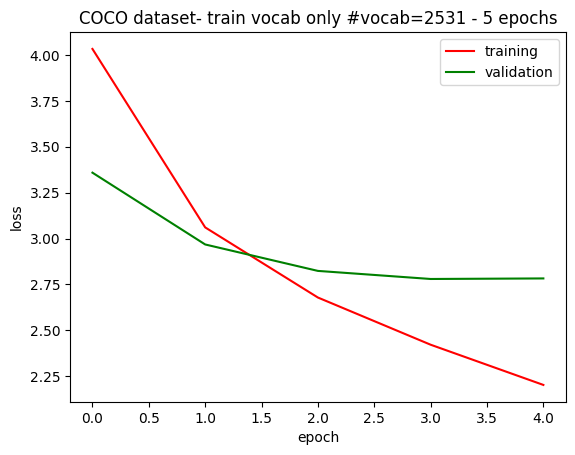

In [60]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

In [61]:
# save model after training
decoder_ckpt = torch.save(decoder, "coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [26]:
from PIL import Image


class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.pth = 'COMP5625M_data_assessment_2/coco/images'

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 3]  
        caption = self.df.iloc[idx, 4]   

        img_path = os.path.join(self.pth, img_name)
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image, caption

In [27]:
transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [64]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=128, bias=True)
  (bn): BatchNorm1d(128, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2531, 128)
  (rnn): LSTM(128, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2531, bias=True)
)

In [28]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

GENERATED: a plate of food with a knife and a bowl of soup

REFERENCE: closeup of bins of food that include broccoli and bread




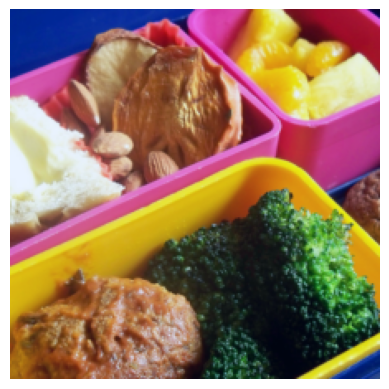


GENERATED: a kitchen with a sink and a microwave

REFERENCE: a small kitchen with a lot of filled up shelves




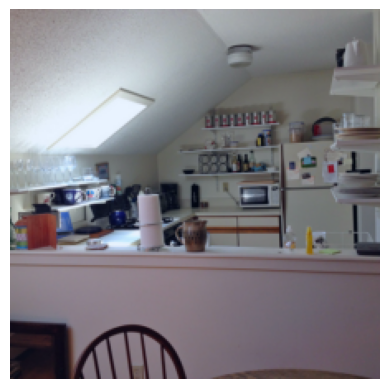


GENERATED: a woman holding a teddy bear in a room

REFERENCE: a woman on a bench is hugging a giant teddy bear




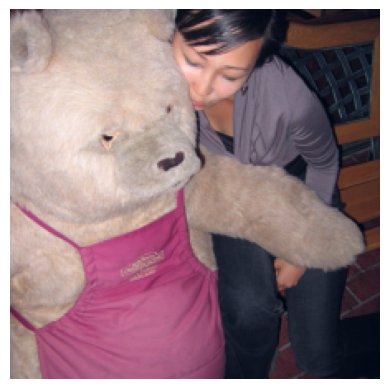


GENERATED: a large kite flying through the sky in

REFERENCE: a kite is flying high above a house on a beach




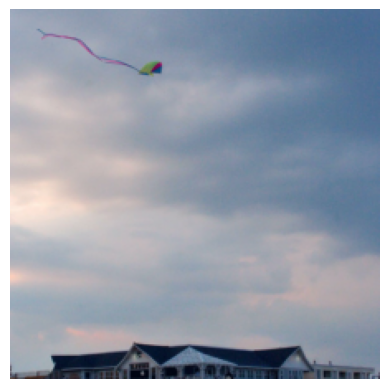


GENERATED: a car parked in front of a car with a

REFERENCE: two green farm trucks parked behind some buildings




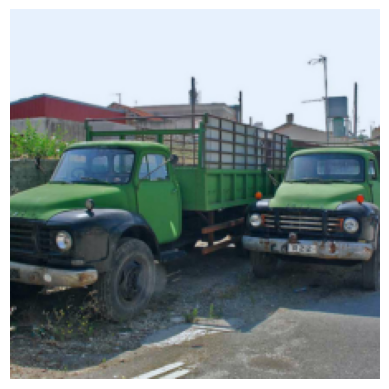

In [67]:
IMAGES_TO_SHOW = 5
idx = 0
with torch.no_grad():
    for i, (image, img_name) in enumerate(test_loader):
        
        image = image.to(device)
        features = model(image)
        samples = decoder.sample(features).cpu().numpy()
        predictions = samples[0]
    
        predictions_trimmed = predictions[(predictions != vocab('<start>')) & 
                                               (predictions != vocab('<end>'))]
        captions = decode_caption(predictions_trimmed, vocab)
        
        print(f"GENERATED: {captions}\n")
        
        # Display the reference filename
        print(f"REFERENCE: {img_name[0]}\n")
        
        print("===================================\n")
        
        timshow(image[0].cpu())
        
        print("===================================\n")
        idx += 1
        if idx == IMAGES_TO_SHOW:
            break


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

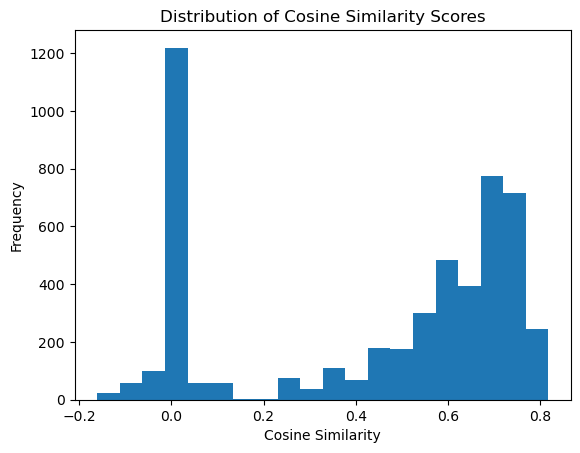

In [ ]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as sklearn_cosine_similarity

# First, get the embeddings for each word in your vocabulary
word_embeds = decoder.embed.weight.data.cpu().numpy()

def get_embedding(caption, vocab, word_embeddings):
    words = caption.split()
    indices = [vocab.word2idx[word] for word in words if word in vocab.word2idx]
    
    if len(indices) == 0:
        return np.zeros(word_embeddings.shape[1])
    
    valid_embeddings = word_embeddings[indices]
    caption_embedding = np.mean(valid_embeddings, axis=0)   
    return caption_embedding

similarity_scores = []

# Loop through the test dataset
for images, actual_captions in test_loader.dataset:

    if images.ndim == 3:
        images = images.unsqueeze(0) 

    images = images.to(device)
    features = model(images)
    samples = decoder.sample(features).cpu().numpy()


    generated_captions = []
    for sample in samples:
        generated_captions.append(decode_caption(sample, vocab))

    generated_embeddings = np.zeros((len(generated_captions), word_embeds.shape[1]))
    for i, caption in enumerate(generated_captions):
        generated_embeddings[i] = get_embedding(caption, vocab, word_embeds)

    true_embeddings = np.zeros((len(actual_captions), word_embeds.shape[1]))
    for i, caption in enumerate(actual_captions):
        true_embeddings[i] = get_embedding(caption, vocab, word_embeds)

    for i in range(len(generated_embeddings)):
        gen_emb = generated_embeddings[i]
        true_emb = true_embeddings[i]
        similarity = sklearn_cosine_similarity([gen_emb], [true_emb])
        similarity_scores.append(similarity.item())

# Display a histogram of the distribution of cosine similarity scores
plt.hist(similarity_scores, bins=20)
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.title('Distribution of Cosine Similarity Scores')
plt.show()


##### Thank you for completing the assessment - if you have any question, please ask on teams channel or attend lab sessions on Tuesdays and Wednesdays.